# Import the files

Procure these files and upload
- Weight file: it’s the trained model, the core of the algorythm to detect the objects. (Link provided)
- Cfg file: it’s the configuration file, where there are all the settings of the algorythm.
- Name files: contains the name of the objects that the algorythm can detect.

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
cv2.__version__

'4.1.2'

In [3]:

# !wget https://pjreddie.com/media/files/yolov3.weights


In [4]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))


# Upload the image for which predictions are required


In [5]:
# Loading image
img = cv2.imread("laptop.jpeg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [6]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# You can also adjust the confidence score in the if statement


In [7]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.8:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non maximum suppresion

In [8]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

- Box: contain the coordinates of the rectangle sorrounding the object detected.
- Label: it’s the name of the object detected
- Confidence: the confidence about the detection from 0 to 1.

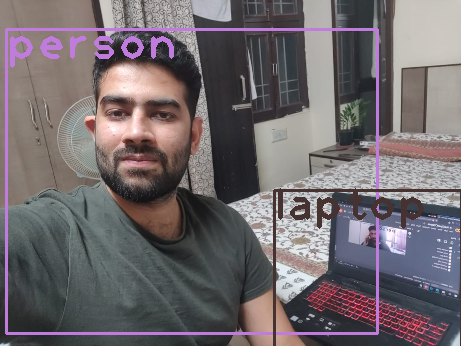

In [9]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()